# Cifar10 classification with and without normalization

In this notebook you will download the cifar10 dataset which contains quite small images (32x32x3) of 10 classes. The data is from the Canadian Institute For Advanced Research. You will plot examples of the images with the class label. Note that because the images are so small it's not always very easy to recoginse which of the ten classes is on the iamge, even as a human. After loading the dataset you will train a Convolutional neural networks to predict the the test dataset. You will train the neural network once with normalized data and once without.


**Dataset:**  You work with the Cifar10 dataset. You have 60'000 32x32 pixel color images of 10 classes ("airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck")

**Content:**
* load the original cifar10 data create a train val and test dataset
* visualize samples of cifar10 dataset
* use keras to train a CNN with the normalized and the unnormalized version of the data
* check if the normalization has an impact on the test performance of the data



#### Imports


In [0]:
# load required libraries:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten , Activation
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras import optimizers



### Load and plot the data

In the next cell you will load the Cifar10 dataset, 50'000 images are in the training set and 10'000 are in the test dataset. You will use 10'000 for the train and validation dataset.
You will plot one random example of each label and will see
that the images are really small and finally you can convert the lables into the one hot encoding.


In [0]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
# separate train val and test dataset
X_train=x_train[0:10000] 
Y_train=to_categorical(y_train[0:10000],10) # one-hot encoding

X_val=x_train[20000:30000] 
Y_val=to_categorical(y_train[20000:30000],10)

X_test=x_test 
Y_test=to_categorical(y_test,10)

del x_train, y_train, x_test, y_test


print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(10000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


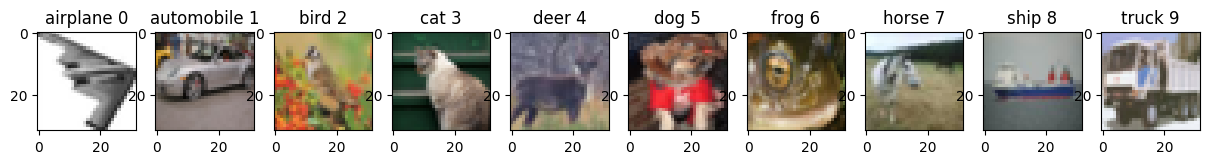

In [5]:
labels=np.array(["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"])
#sample image of each label
plt.figure(figsize=(15,15))
for i in range(0,len(np.unique(np.argmax(Y_train,axis=1)))):
    rmd=np.random.choice(np.where(np.argmax(Y_train,axis=1)==i)[0],1)
    plt.subplot(1,10,i+1)
    img=X_train[rmd]
    plt.imshow(img[0,:,:,:])
    plt.title(labels[i]+" "+np.str(np.argmax(Y_train,axis=1)[rmd][0]))

In [6]:
# check the shape of the data
X_train.shape,Y_train.shape,X_val.shape,Y_val.shape

((10000, 32, 32, 3), (10000, 10), (10000, 32, 32, 3), (10000, 10))

# CNN as classification model for the Cifar10 dataset
Now it's your turn, train two CNNs with the same architecture.
* One CNN should be with the original image data (no normalization)
* One CNN should be with the normalized image data 
* Use the train data to fit the model, the validation to validate the training and the test dataset for the performance estimation on new unseen data.

Use the following hyperparameters 

>the relu activation function  
>kernelsize of 3x3  
>poolingsize of 2x2   
>use 2 convolutional blocks with 8 filters and then a maxpooling layer  followed by again 2 convolutional blocks with 16 filters and then a maxpooling  
> then we flatten the output and use a fully connected layer with 40 nodes and the output has 10 nodes with the softmax activation.

Compare the performance on the testdataest. What do you observe?

### Without normalization

In [0]:
### Your code here ####

batch_size = 128
nb_classes = 10
img_rows, img_cols = 32, 32
kernel_size = (3, 3)
input_shape = (img_rows, img_cols, 3)
pool_size = (2, 2)


model = Sequential()

model.add(Convolution2D(8,kernel_size,padding='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(8, kernel_size,padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))

model.add(Convolution2D(16, kernel_size,padding='same'))
model.add(Activation('relu'))
model.add(Convolution2D(16,kernel_size,padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))

model.add(Flatten())
model.add(Dense(40))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# compile model and intitialize weights
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [8]:
# summarize model along with number of model weights
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 8)         224       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 8)         584       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 8)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 16)        1168      
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 16)        0

In [9]:
# train the model
history=model.fit(X_train, Y_train, 
                  batch_size=128, 
                  epochs=20,
                  verbose=1, 
                  validation_data=(X_val, Y_val)
                 )

Train on 10000 samples, validate on 10000 samples
Epoch 1/20
10000/10000 [==============================] - 3s 349us/sample - loss: 4.3522 - accuracy: 0.1020 - val_loss: 2.2996 - val_accuracy: 0.0959
Epoch 2/20
10000/10000 [==============================] - 1s 61us/sample - loss: 2.2849 - accuracy: 0.1245 - val_loss: 2.2634 - val_accuracy: 0.1443
Epoch 3/20
10000/10000 [==============================] - 1s 62us/sample - loss: 2.1928 - accuracy: 0.1806 - val_loss: 2.0970 - val_accuracy: 0.2221
Epoch 4/20
10000/10000 [==============================] - 1s 61us/sample - loss: 1.9667 - accuracy: 0.2651 - val_loss: 1.8514 - val_accuracy: 0.3043
Epoch 5/20
10000/10000 [==============================] - 1s 61us/sample - loss: 1.7521 - accuracy: 0.3426 - val_loss: 1.7852 - val_accuracy: 0.3345
Epoch 6/20
10000/10000 [==============================] - 1s 63us/sample - loss: 1.6315 - accuracy: 0.4011 - val_loss: 1.6875 - val_accuracy: 0.3653
Epoch 7/20
10000/10000 [==============================]

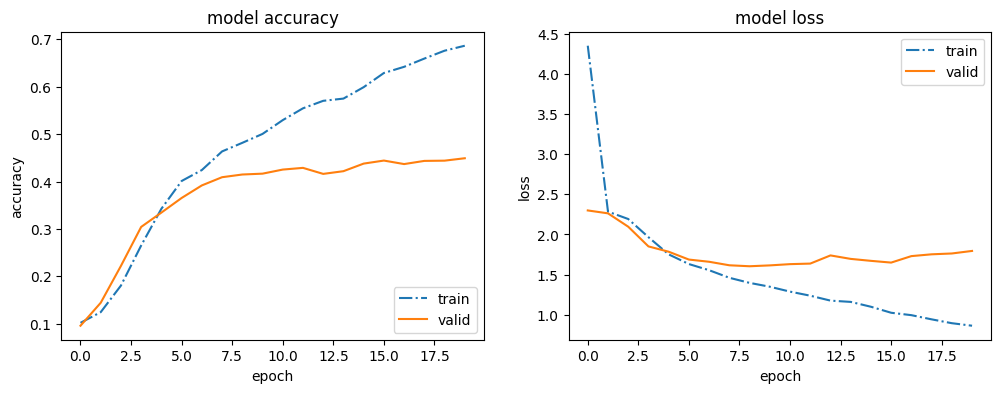

In [10]:
# plot the development of the accuracy and loss during training
plt.figure(figsize=(12,4))
plt.subplot(1,2,(1))
plt.plot(history.history['accuracy'],linestyle='-.')
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,(2))
plt.plot(history.history['loss'],linestyle='-.')
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')

In [11]:
pred=model.predict(X_test)
print(confusion_matrix(np.argmax(Y_test,axis=1),np.argmax(pred,axis=1)))
acc = np.sum(np.argmax(Y_test,axis=1)==np.argmax(pred,axis=1))/len(pred)
print("Acc_cnn= " , acc)

[[481  23 100  25  53  10  22  43 208  35]
 [ 28 523  19  36  30  16  22  27 127 172]
 [ 74   8 359  75 180  82 109  47  55  11]
 [ 30  24 144 223 120 170 177  58  29  25]
 [ 28   8 205  63 387  60 121 101  18   9]
 [ 20  11 147 152 122 324 124  64  24  12]
 [ 10  12  83  96 116  61 561  26  24  11]
 [ 31  16  93  52 142  88  53 480   9  36]
 [117  68  36  17  22  11  16   4 663  46]
 [ 54 236  21  51  23  19  32  49 108 407]]
Acc_cnn=  0.4408


### With normalization

In [0]:
### Your code here ####

batch_size = 128
nb_classes = 10
img_rows, img_cols = 32, 32
kernel_size = (3, 3)
input_shape = (img_rows, img_cols, 3)
pool_size = (2, 2)


model = Sequential()

model.add(Convolution2D(8,kernel_size,padding='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(8, kernel_size,padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))

model.add(Convolution2D(16, kernel_size,padding='same'))
model.add(Activation('relu'))
model.add(Convolution2D(16,kernel_size,padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))

model.add(Flatten())
model.add(Dense(40))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# compile model and intitialize weights
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [13]:
# summarize model along with number of model weights
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 8)         224       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 8)         584       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 8)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 16)        1168      
_________________________________________________________________
activation_8 (Activation)    (None, 16, 16, 16)       

In [14]:
# train the model
history=model.fit(X_train/255, Y_train, 
                  batch_size=128, 
                  epochs=20,
                  verbose=1, 
                  validation_data=(X_val/255, Y_val)
                 )

Train on 10000 samples, validate on 10000 samples
Epoch 1/20
10000/10000 [==============================] - 2s 156us/sample - loss: 2.0721 - accuracy: 0.2333 - val_loss: 1.8125 - val_accuracy: 0.3427
Epoch 2/20
10000/10000 [==============================] - 1s 83us/sample - loss: 1.7339 - accuracy: 0.3740 - val_loss: 1.6530 - val_accuracy: 0.4072
Epoch 3/20
10000/10000 [==============================] - 1s 79us/sample - loss: 1.6012 - accuracy: 0.4200 - val_loss: 1.5614 - val_accuracy: 0.4367
Epoch 4/20
10000/10000 [==============================] - 1s 76us/sample - loss: 1.5213 - accuracy: 0.4495 - val_loss: 1.5100 - val_accuracy: 0.4523
Epoch 5/20
10000/10000 [==============================] - 1s 78us/sample - loss: 1.4665 - accuracy: 0.4735 - val_loss: 1.5318 - val_accuracy: 0.4539
Epoch 6/20
10000/10000 [==============================] - 1s 76us/sample - loss: 1.4235 - accuracy: 0.4905 - val_loss: 1.5806 - val_accuracy: 0.4369
Epoch 7/20
10000/10000 [==============================]

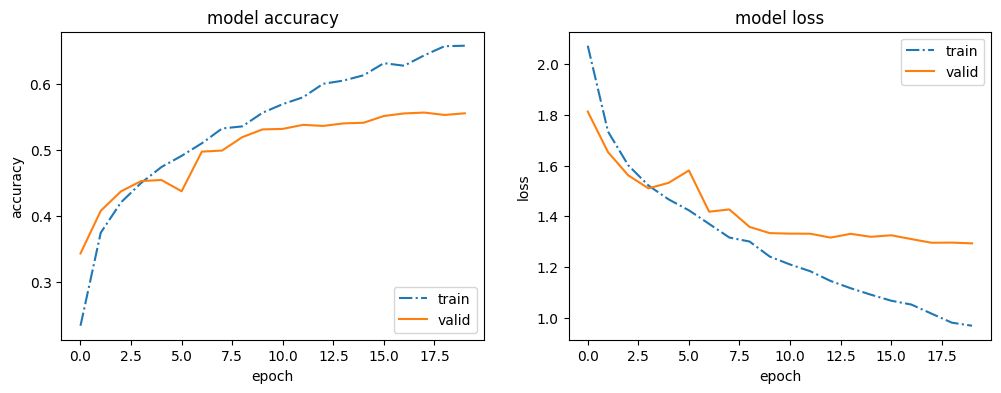

In [15]:
# plot the development of the accuracy and loss during training
plt.figure(figsize=(12,4))
plt.subplot(1,2,(1))
plt.plot(history.history['accuracy'],linestyle='-.')
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,(2))
plt.plot(history.history['loss'],linestyle='-.')
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')

In [16]:
pred=model.predict(X_test/255)
print(confusion_matrix(np.argmax(Y_test,axis=1),np.argmax(pred,axis=1)))
acc = np.sum(np.argmax(Y_test,axis=1)==np.argmax(pred,axis=1))/len(pred)
print("Acc_cnn= " , acc)

[[517  15  98  31   9  24  15  20 232  39]
 [ 36 620  18  23   4  14  10  18 113 144]
 [ 56   8 507 109  46 135  53  43  29  14]
 [ 20   9 126 397  17 272  68  35  35  21]
 [ 20   4 245 108 295 101  87 110  22   8]
 [ 13   3 106 203  26 542  21  46  30  10]
 [ 10   9  91 147  30  58 594  18  16  27]
 [ 21   2  64  75  39 141  17 605  14  22]
 [ 38  38  30  22   6  12   7   9 813  25]
 [ 46 125  28  46   1  21  22  38  90 583]]
Acc_cnn=  0.5473
